# **Mini-Projeto DT/RF**
---

Este mini-projeto tem como objetivo construir modelos preditivos para estimar a sobrevivência dos passageiros do Titanic utilizando arquiteturas baseadas em Decision Trees (DT) e Random Forests (RF). O naufrágio do Titanic é um dos desastres marítimos mais infames da história, e a análise dos dados dos passageiros fornece uma rica base para explorar técnicas de aprendizado de máquina.

**Objetivos:**
- Pré-processar os dados do Titanic para torná-los adequados para treinamento de modelos de aprendizado de máquina.
- Construir e treinar modelos baseados em Decision Trees (DT) e Random Forests (RF) para prever a sobrevivência dos passageiros.
- Avaliar o desempenho dos modelos utilizando métricas adequadas e ajustar hiperparâmetros para otimização.

**Metodologia:**
1. **Coleta e Exploração de Dados:** Carregamento e análise inicial dos dados para entender a distribuição e características principais.
2. **Pré-processamento de Dados:** Tratamento de valores ausentes, codificação de variáveis categóricas e normalização dos dados.
3. **Construção do Modelo DT:** Definição das arquiteturas e configuração dos hiperparâmetros. Uso de pelo menos uma Random Forest (RF) no treinamento.
4. **Treinamento e Avaliação:** Treinamento dos modelos nos dados de treinamento e avaliação de seus desempenhos nos dados de teste.

**Grupo:**
* Cleber Victor da Silva Junior (cvsj)   
* João Marcelo de Souza Ferreira (jmsf3)
* Marcela Arruda Asfora (maa5)
* Maria Vitória Soares Muniz (mvsm3)
* Victor Pessoa Diniz (vpd)

## **Bibliotecas Utilizadas**
---

Neste projeto, utilizamos diversas bibliotecas do ecossistema Python para análise de dados e visualização:

- **NumPy:** Biblioteca para computação numérica em Python, utilizada para manipulação de arrays e operações matemáticas eficientes.
- **Pandas:** Biblioteca poderosa para análise e manipulação de dados, especialmente útil para trabalhar com dados tabulares. Utilizamos Pandas para carregar, limpar e transformar os dados do Titanic.
- **Seaborn:** Biblioteca de visualização de dados baseada no Matplotlib, que proporciona gráficos estatísticos atraentes e informativos. Utilizamos Seaborn para criar visualizações que ajudam a entender melhor os padrões e características dos dados.
- **Matplotlib:** Biblioteca de plotagem 2D que serve como base para o Seaborn, utilizada diretamente para personalizar e criar gráficos detalhados.
- **Scikit-learn:** Biblioteca modular que contém os modelos de treinamento necessários para a atividade. Utilizada para o treinamento dos modelos baseados em DT e RF.

Essas bibliotecas, quando combinadas, fornecem um conjunto robusto de ferramentas para a análise de dados e a construção de modelos preditivos.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

## **Base de Dados**
---

O dataset "Titanic - Machine Learning from Disaster" é um conjunto de dados clássico amplamente utilizado para o ensino e prática de técnicas de aprendizado de máquina. Ele contém informações detalhadas sobre os passageiros a bordo do RMS Titanic, que naufragou em sua viagem inaugural em 1912. O dataset inclui variáveis como idade, gênero, classe de cabine, tarifa paga, número de parentes a bordo, entre outras. A variável alvo é `Survived`, que indica se um passageiro sobreviveu ao desastre. Este conjunto de dados é ideal para explorar métodos de análise de dados, visualização, e construção de modelos preditivos, fornecendo uma rica base para entender como diferentes características podem influenciar a probabilidade de sobrevivência.

In [ ]:
!git clone https://github.com/victorpdiniz/IF684-Titanic.git

Cloning into 'IF684-Titanic'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 11 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 265.79 KiB | 9.84 MiB/s, done.


In [ ]:
train_set = pd.read_csv('IF684-Titanic/data/train.csv')
test_set = pd.read_csv('IF684-Titanic/data/test.csv')

In [ ]:
test_survived = pd.read_csv('IF684-Titanic/data/gender_submission.csv')
test_set = test_set.merge(test_survived, on='PassengerId')

test_cols = test_set.columns.tolist()
test_cols.remove('Survived')
test_cols.insert(test_cols.index('PassengerId') + 1, 'Survived')

test_set = test_set[test_cols]

## **Análise Exploratória**
---

A análise exploratória dos dados é uma fase inicial que resume as principais características dos dados usando métodos visuais e estatísticos. Seu objetivo é compreender a estrutura dos dados, detectar padrões, identificar anomalias e verificar pressupostos, orientando o desenvolvimento de modelos preditivos. Nesta análise, abordaremos os seguintes tópicos: **Organização da Base de Dados**, **Análise por Faixa Etária**, **Análise por Gênero**, ****Análise por Classe**, **Correlação** e **Dados Faltantes e Outliers**.

### **Organização da Base de Dados**

A base de dados  possui 891 linhas (cada linha representa um passageiro) e 12 colunas (cada coluna contém um atributo do passageiro, como identificador, idade, classe social, etc.). Na lista abaixo, estão todos os detalhes das colunas:

* **`PassengerId`:** Identificador único de cada passageiro (valores inteiros, sem valores ausentes).
* **`Survived`:** Indica se o passageiro sobreviveu ou não (valores inteiros: `1` para sobreviveu, `0` para não sobreviveu).
* **`Pclass`:** Classe social do passageiro (valores inteiros: `1` para primeira classe, `2` para segunda classe, `3` para terceira classe).
* **`Name`:** Nome completo do passageiro (valores de texto).
* **`Sex`:** Sexo do passageiro (valores de texto: `'male'` para masculino, `'female'` para feminino).
* **`Age`:** Idade do passageiro em anos (valores decimais, com alguns valores ausentes).
* **`SibSp`:** Número de irmãos e cônjuge a bordo (valores inteiros).
* **`Parch`:** Número de pais e filhos a bordo (valores inteiros).
* **`Ticket`:** Número do bilhete do passageiro (valores de texto).
* **`Fare`:** Tarifa paga pelo passageiro (valores decimais).
* **`Cabin`:** Número da cabine do passageiro (valores de texto, com muitos valores ausentes).
* **`Embarked`:** Porto de embarque do passageiro (valores de texto: `'S'` para Southampton, `'C'` para Cherbourg, `'Q'` para Queenstown).





In [ ]:
train_set.shape

(891, 12)

In [ ]:
print(tabulate(train_set, headers='keys', tablefmt='psql'))

+-----+---------------+------------+----------+------------------------------------------------------------------------------------+--------+--------+---------+---------+--------------------+----------+-----------------+------------+
|     |   PassengerId |   Survived |   Pclass | Name                                                                               | Sex    |    Age |   SibSp |   Parch | Ticket             |     Fare | Cabin           | Embarked   |
|-----+---------------+------------+----------+------------------------------------------------------------------------------------+--------+--------+---------+---------+--------------------+----------+-----------------+------------|
|   0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                                                            | male   |  22    |       1 |       0 | A/5 21171          |   7.25   | nan             | S          |
|   1 |             2 |          1 |        1 | Cumings, Mrs. Jo

In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Variáveis numéricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Variáveis categóricas
categoric_features = train_set.select_dtypes(exclude=np.number)
categoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

### **Análise por Faixa Etária**

***Porcentagem de Passageiros por Faixa Etária***

A base de dados apresenta a seguinte distribuição por faixa etária:
* `Crianças`: 69 indivíduos, representando **7.7%** dos passageiros.
* `Adolescentes`: 44 indivíduos, representando **4.9%** dos passageiros.
* `Adultos`: 590 indivíduos, representando **66.3%** dos passageiros.
* `Idosos`: 188 indivíduos, representando **21.1%** dos passageiros.

Critério utilizado para classificar as faixas etárias:
* `Crianças`: Idade menor ou igual a 12 anos
* `Adolescentes`: Idade entre 13 e 17 anos
* `Adultos`: Idade entre 18 e 64 anos
* `Idosos`: Idade maior de 64 anos

Foi realizada uma análise dos percentuais de sobreviventes e não sobreviventes por faixa etária, revelando os seguintes resultados:

***Porcentagem de Não Sobreviventes por Faixa Etária***

* `Crianças`: 42.03%
* `Adolescentes`: 52.27%
* `Adultos`: 61.36%
* `Idosos`: 71.80%

***Porcentagem de Sobreviventes por Faixa Etária***

* `Crianças`: 57.97%
* `Adolescentes`: 47.73%
* `Adultos`: 38.64%
* `Idosos`: 28.20%

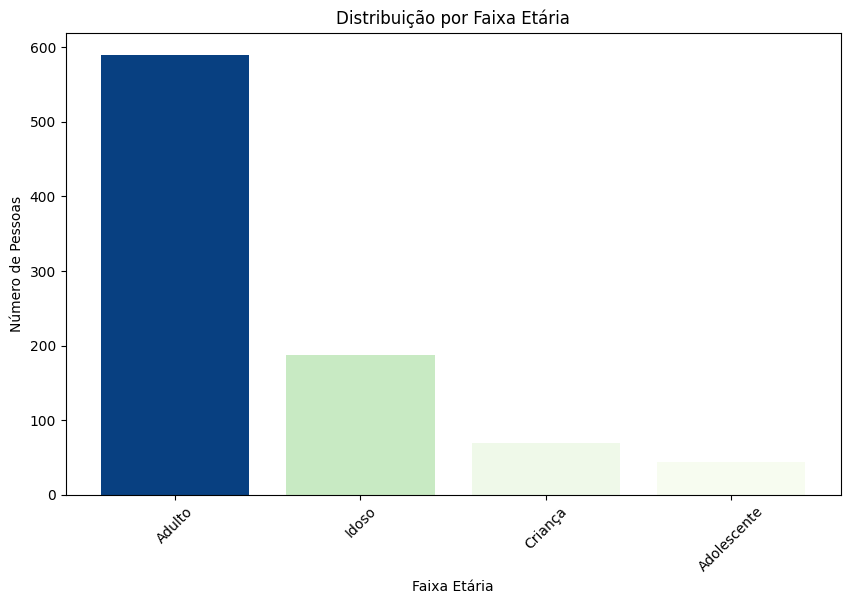

In [ ]:
def categorize_age(age):
    if age <= 12:
        return 'Criança'
    elif 13 <= age <= 17:
        return 'Adolescente'
    elif 18 <= age <= 64:
        return 'Adulto'
    else:
        return 'Idoso'

temp_df = train_set.copy()
temp_df['AgeGroup'] = temp_df['Age'].apply(categorize_age)

age_group_counts = temp_df['AgeGroup'].value_counts()

cmap = plt.get_cmap('GnBu')
norm = plt.Normalize(age_group_counts.min(), age_group_counts.max())
colors = cmap(norm(age_group_counts.values))

plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color=colors)
plt.title('Distribuição por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)

plt.show()

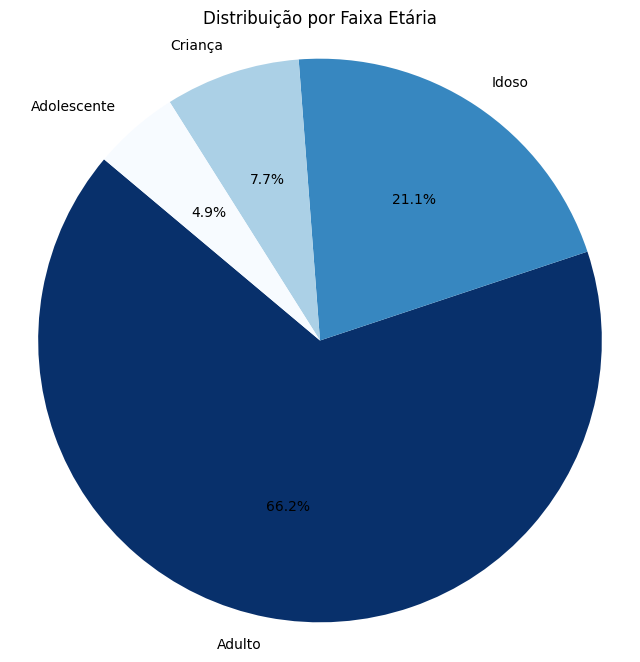

In [ ]:
total_people = len(temp_df)
age_group_percentage = age_group_counts / total_people * 100

cmap = plt.get_cmap('Blues_r')
colors = cmap(np.linspace(0, 1, len(age_group_percentage)))

plt.figure(figsize=(8, 8))
plt.pie(age_group_percentage, labels=age_group_percentage.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição por Faixa Etária')
plt.axis('equal')

plt.show()

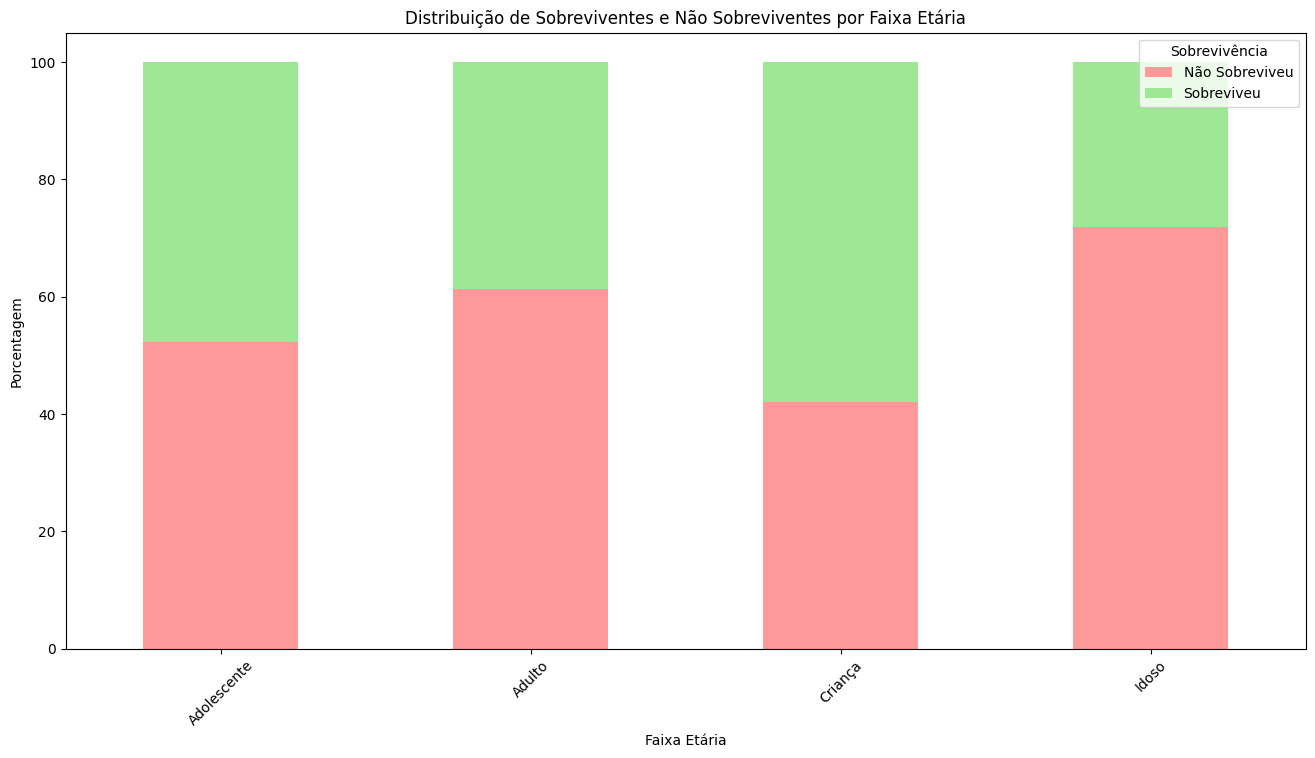

In [ ]:
age_group_survival = temp_df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

totals = age_group_survival.sum(axis=1)
age_group_survival['Porcentagem Sobreviveu'] = age_group_survival[1] / totals * 100
age_group_survival['Porcentagem Não Sobreviveu'] = age_group_survival[0] / totals * 100

fig, ax = plt.subplots(figsize=(16, 8))
age_group_survival[['Porcentagem Não Sobreviveu', 'Porcentagem Sobreviveu']].plot(kind='bar', stacked=True, ax=ax, color=['#ff9999', '#9ee895'])
ax.set_title('Distribuição de Sobreviventes e Não Sobreviventes por Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Porcentagem')
ax.set_xticklabels(age_group_survival.index, rotation=45)
ax.legend(['Não Sobreviveu', 'Sobreviveu'], title='Sobrevivência')

plt.show()

### **Análise por Gênero**

A base de dados apresenta a seguinte distribuição por gênero:

* `Mulheres`: 314 indivíduos, representando **35.2%** dos passageiros.
* `Homens`: 577 indivíduos, representando **64.8%** dos passageiros.

***Porcentagem de Sobreviventes por Sexo***

* `Mulheres`: 74.20%
* `Homens`: 18.89%

***Porcentagem de Não Sobreviventes por Sexo***
* `Mulheres`: 25.80%
* `Homens`: 81.11%

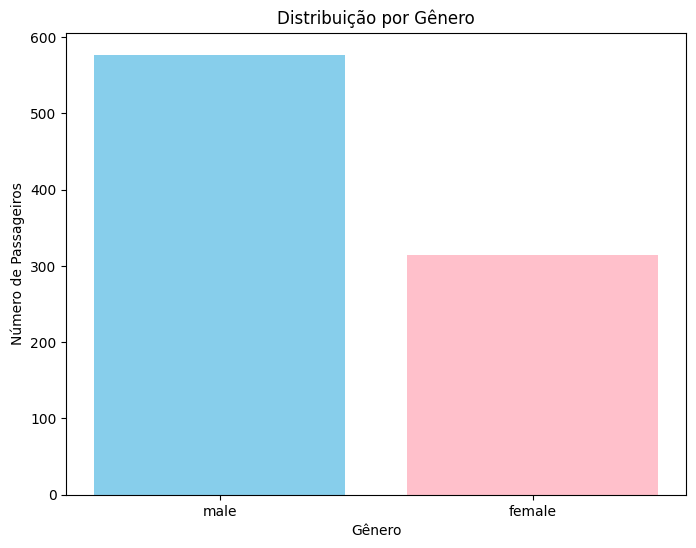

In [ ]:
sex_counts = train_set['Sex'].value_counts()

colors = ['skyblue', 'pink']

plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=colors)
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Passageiros')

plt.show()

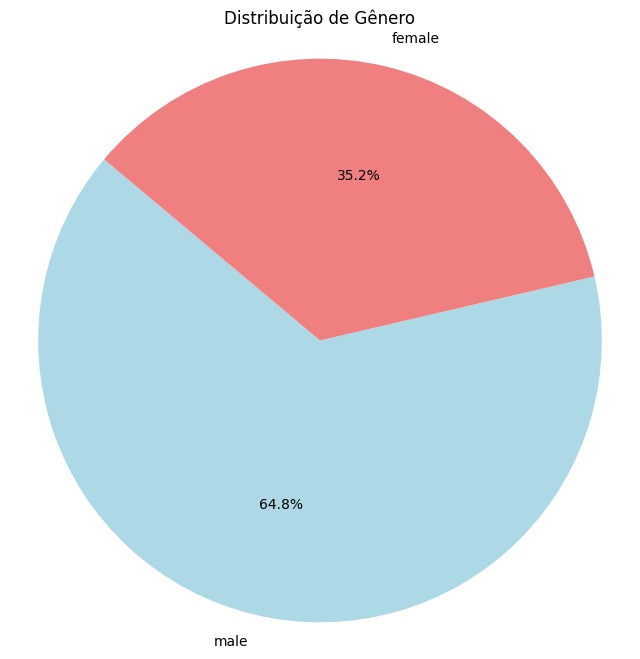

In [ ]:
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição de Gênero')
plt.axis('equal')

plt.show()

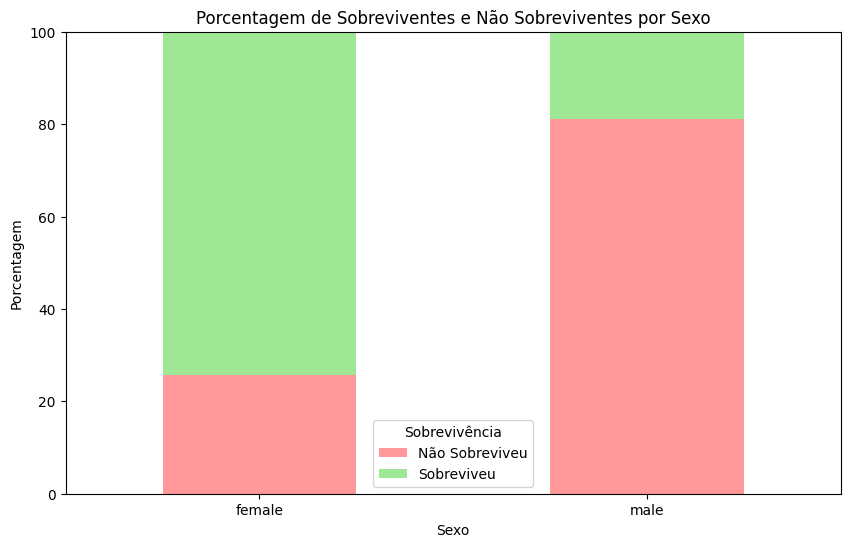

In [ ]:
survival_sex_counts = train_set.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

totals = survival_sex_counts.sum(axis=1)
survival_sex_counts['Porcentagem Sobreviveu'] = survival_sex_counts[1] / totals * 100
survival_sex_counts['Porcentagem Não Sobreviveu'] = survival_sex_counts[0] / totals * 100
survival_sex_counts[['Porcentagem Não Sobreviveu', 'Porcentagem Sobreviveu']].plot(kind='bar', stacked=True, color=['#ff9999', '#9ee895']  , figsize=(10, 6))

plt.title('Porcentagem de Sobreviventes e Não Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], title='Sobrevivência')
plt.xticks(rotation=0)
plt.ylim(0, 100)

plt.show()

### **Análise por Classe**

A base de dados apresenta a seguinte distribuição por classe:

* `Primeira classe`: 216 indivíduos, representando **24.2%** dos passageiros.
* `Segunda classe`: 184 indivíduos, representando **20.7%** dos passageiros.
* `Terceira classe`: 491 indivíduos, representando **55.1%** dos passageiros.

***Porcentagem de Sobreviventes por Classe***

* `Primeira classe`: 62.96%
* `Segunda classe`: 47.28%
* `Terceira classe`: 24.24%

***Porcentagem de Não Sobreviventes por Classe***
* `Primeira classe`: 37.04%
* `Segunda classe`: 52.72%
* `Terceira classe`: 75.76%


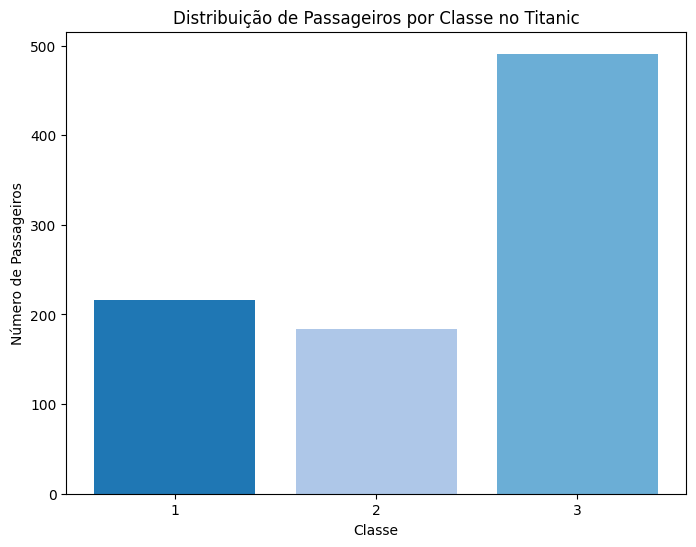

In [ ]:
class_counts = train_set['Pclass'].value_counts().sort_index()

colors = ['#1f77b4', '#aec7e8', '#6baed6']

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=colors)

plt.title('Distribuição de Passageiros por Classe no Titanic')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)

plt.show()

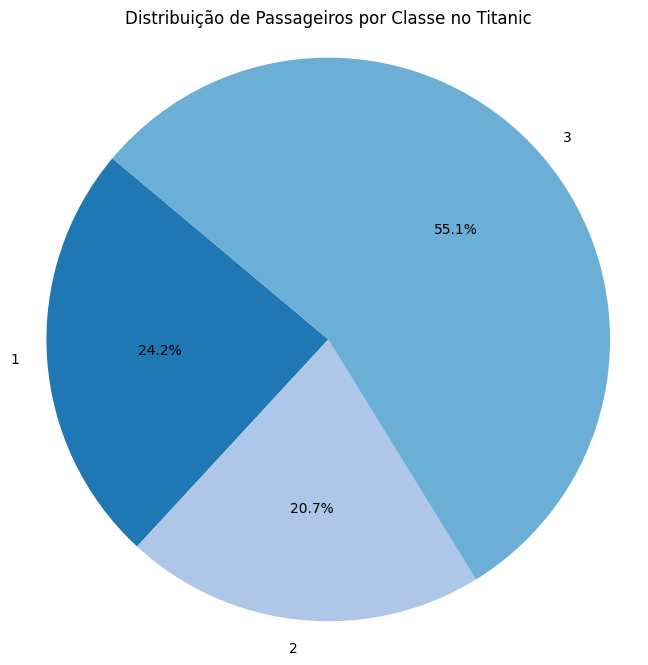

In [ ]:
labels = class_counts.index.astype(str)
sizes = class_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição de Passageiros por Classe no Titanic')
plt.axis('equal')

plt.show()

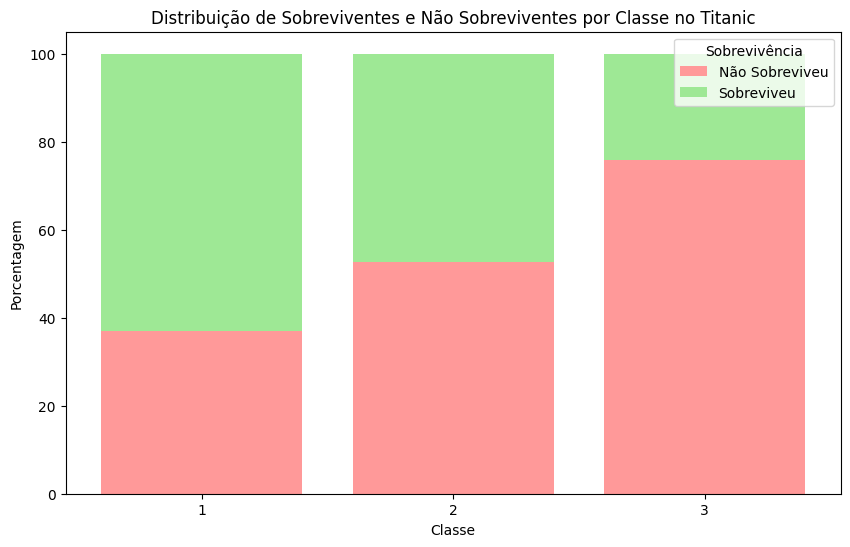

In [ ]:
survival_by_class = train_set.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
totals = survival_by_class.sum(axis=1)

survival_by_class['Porcentagem Sobreviveu'] = survival_by_class[1] / totals * 100
survival_by_class['Porcentagem Não Sobreviveu'] = survival_by_class[0] / totals * 100

labels = survival_by_class.index.astype(str)
sobreviveu = survival_by_class['Porcentagem Sobreviveu']
n_sobreviveu = survival_by_class['Porcentagem Não Sobreviveu']

colors = ['#ff9999', '#9ee895']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, n_sobreviveu, color=colors[0], label='Não Sobreviveu')
ax.bar(labels, sobreviveu, bottom=n_sobreviveu, color=colors[1], label='Sobreviveu')

ax.set_title('Distribuição de Sobreviventes e Não Sobreviventes por Classe no Titanic')
ax.set_xlabel('Classe')
ax.set_ylabel('Porcentagem')
ax.legend(title='Sobrevivência')

plt.show()

### **Correlação**

A análise de correlações entre variáveis é uma etapa fundamental na exploração e entendimento de um conjunto de dados. Correlações indicam o grau de relacionamento entre duas variáveis e podem fornecer insights valiosos sobre como uma variável pode influenciar outra.

In [ ]:
# Correlação das variáveis numéricas em relação ao atributo 'Survived'
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



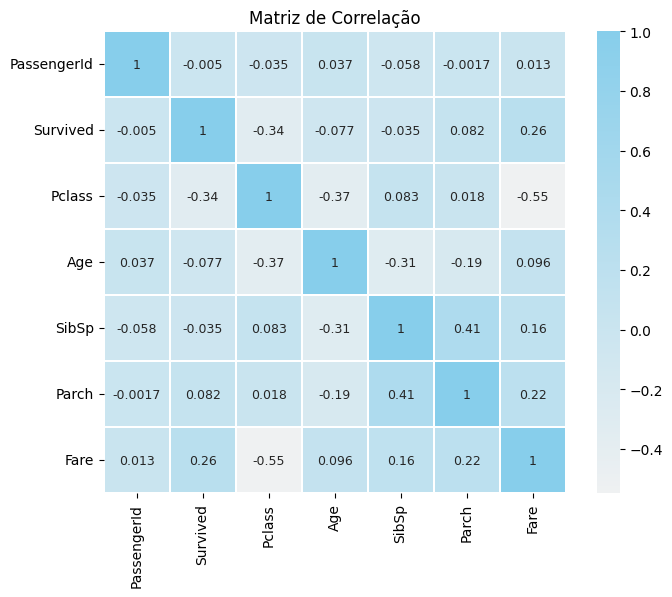

In [ ]:
# Mapa de calor da matriz de correlação entre todas as variáveis
cmap = sns.light_palette('skyblue', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Matriz de Correlação')
plt.show()

### **Dados Faltantes e Outliers**

A coluna `Age` apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros não teve sua idade registrada. A coluna `Cabin` é a que apresenta o maior número de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines não foram registradas ou os passageiros não tinham uma cabine específica. A coluna `Embarked` possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


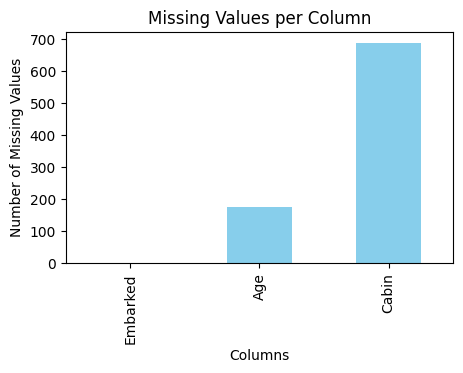

In [ ]:
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing.plot.bar(color='skyblue', figsize=(5, 3))
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')

plt.show()

In [ ]:
outliers = {}

for col in train_set.columns:
    if pd.api.types.is_numeric_dtype(train_set[col]):
        Q1 = train_set[col].quantile(0.25)
        Q3 = train_set[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)][col].count()

print('Número de Outliers por Coluna:')
print(outliers)

Número de Outliers por Coluna:
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 11, 'SibSp': 46, 'Parch': 213, 'Fare': 116}


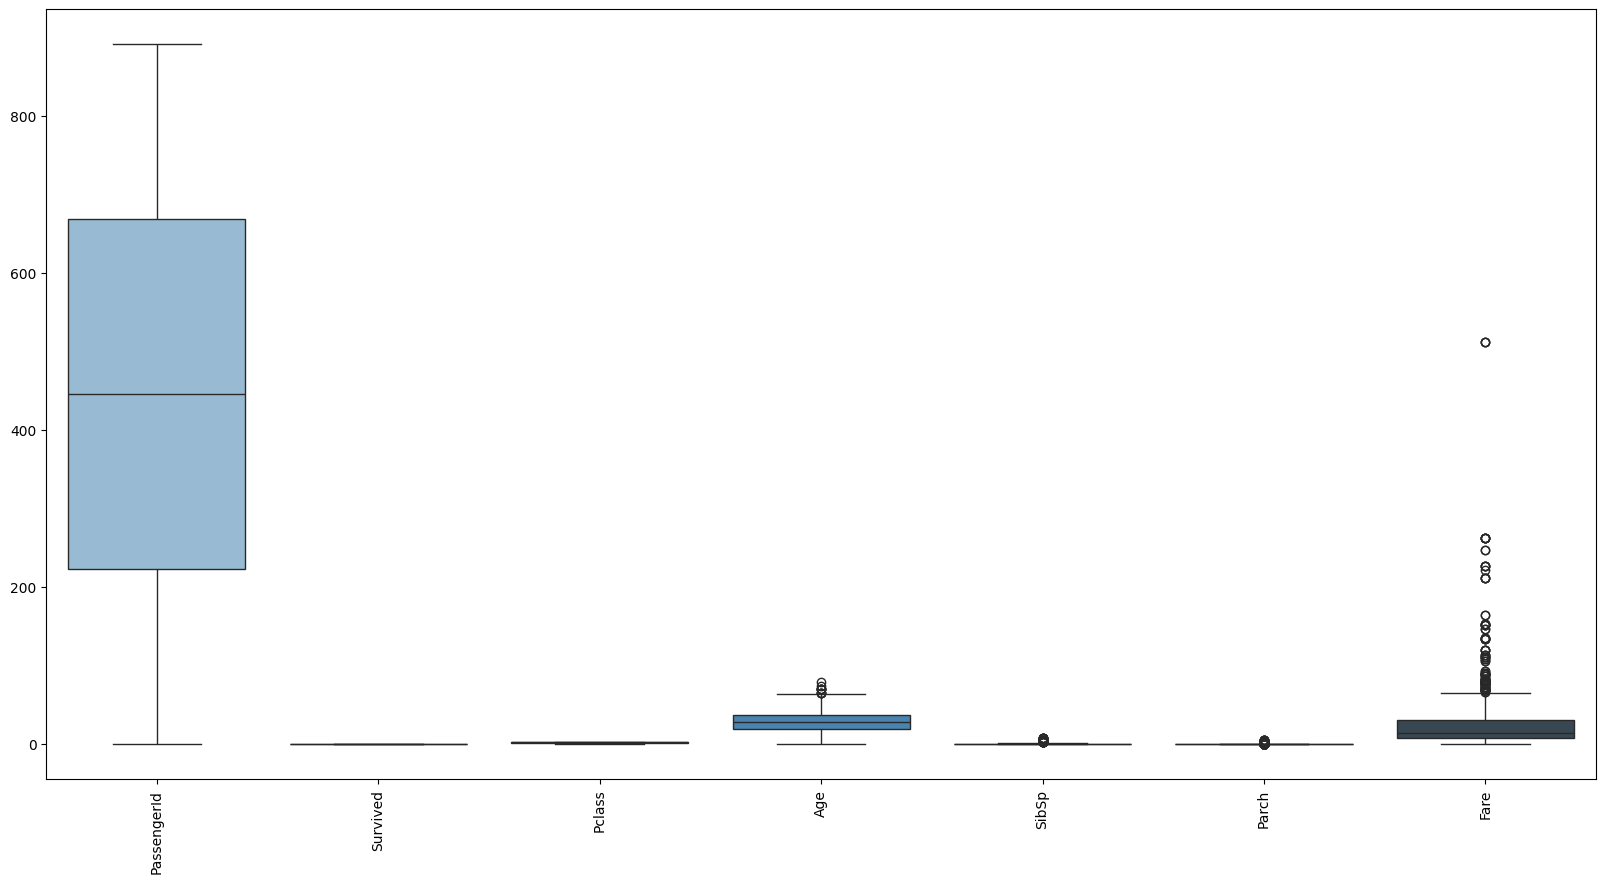

In [ ]:
# Plotando outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_set, palette='Blues_d')
plt.xticks(rotation=90)
plt.show()

## **Tratamento dos Dados**
---

O tratamento dos dados é uma etapa crucial para garantir que o modelo preditivo possa aprender de maneira eficiente e produzir resultados precisos. No projeto de previsão de sobrevivência dos passageiros do Titanic, realizamos as seguintes etapas de pré-processamento: **Tratamento de Valores Ausentes**, **Criação de Novas Características**, **Escalonamento de Dados**, **Codificação de Variáveis Categóricas** e **Remoção de Colunas Irrelevantes**.

### **Tratamento de Valores Ausentes**

- **`Age`:** Valores ausentes são preenchidos com a mediana das idades dos passageiros.
- **`Fare`:** Valores ausentes são preenchidos com a média dos valores do atributo.
- **`Cabin`:** Devido ao grande número de valores ausentes, esta coluna é descartada.
- **`Embarked`:** Valores ausentes são preenchidos com o porto de embarque mais frequente.

In [ ]:
from sklearn.impute import SimpleImputer

# Preencher valores ausentes na coluna 'Age' com a mediana
age_imputer = SimpleImputer(strategy='median')
test_set['Age'] = age_imputer.fit_transform(test_set[['Age']])
train_set['Age'] = age_imputer.fit_transform(train_set[['Age']])

# Remover os valores ausentes da coluna 'Fare'
fare_imputer = SimpleImputer(strategy='mean')
test_set['Fare'] = age_imputer.fit_transform(test_set[['Fare']])
train_set['Fare'] = age_imputer.fit_transform(train_set[['Fare']])

# Descartar a coluna 'Cabin' devido ao grande número de valores ausentes
test_set.drop(columns=['Cabin'], inplace=True)
train_set.drop(columns=['Cabin'], inplace=True)

# Preencher valores ausentes na coluna 'Embarked' com o valor mais frequente
embarked_imputer = SimpleImputer(strategy='most_frequent')
test_set['Embarked'] = embarked_imputer.fit_transform(test_set[['Embarked']]).ravel()
train_set['Embarked'] = embarked_imputer.fit_transform(train_set[['Embarked']]).ravel()

# Verificar se ainda há valores ausentes
print(test_set.isnull().sum(), '\n')
print(train_set.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### **Criação de Novas Características**

- **`Title`:** Extraímos os títulos dos nomes dos passageiros (`Mr`, `Mrs`, `Miss`, etc.) e os utilizamos como uma nova característica categórica.
- **`AgeGroup`:** Agrupamos a idade dos passageiros em faixas etárias distintas para criar uma nova característica categórica. Esta abordagem ajuda a modelar a relação não linear entre idade e sobrevivência e pode melhorar o desempenho do modelo preditivo.
- **`FamilySize`:** Combinamos as colunas `SibSp` (número de irmãos/cônjuges a bordo) e `Parch` (número de pais/filhos a bordo) para criar uma nova coluna `FamilySize`.

In [ ]:
# Extraímos os títulos dos nomes dos passageiros
test_set['Title'] = test_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_set['Title'] = train_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupamos os títulos raros em uma categoria única
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
test_set['Title'] = test_set['Title'].replace(rare_titles, 'Rare')
test_set['Title'] = test_set['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_set['Title'] = test_set['Title'].replace('Mme', 'Mrs')

train_set['Title'] = train_set['Title'].replace(rare_titles, 'Rare')
train_set['Title'] = train_set['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_set['Title'] = train_set['Title'].replace('Mme', 'Mrs')

# Agrupamos a idade dos passageiros em faixas etárias distintas
test_set['AgeGroup'] = pd.cut(test_set['Age'], bins=[0, 12, 17, 64, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior'])
train_set['AgeGroup'] = pd.cut(train_set['Age'], bins=[0, 12, 17, 64, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Combinamos as colunas 'SibSp' e 'Parch' para criar a coluna 'FamilySize'
test_set['FamilySize'] = test_set['SibSp'] + test_set['Parch'] + 1
train_set['FamilySize'] = train_set['SibSp'] + train_set['Parch'] + 1

### **Escalonamento de Dados**


- **`Fare`:** Escalonamos as tarifas para garantir que todas as características estejam na mesma escala. Utilizamos o escalonamento Min-Max.
- **`FamilySize`:** Também escalonamos o tamanho das famílias usando as mesmas técnica da coluna de tarifas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Escalonamento Min-Max para a coluna 'Fare'
test_set['Fare'] = scaler.fit_transform(test_set[['Fare']])
train_set['Fare'] = scaler.transform(train_set[['Fare']])

# Escalonamento Min-Max para a coluna 'FamilySize'
test_set['FamilySize'] = scaler.fit_transform(test_set[['FamilySize']])
train_set['FamilySize'] = scaler.transform(train_set[['FamilySize']])

### **Codificação de Variáveis Categóricas**

- **`Pclass`:** Utilizamos One-Hot Encoding para transformar os valores de classe social em variáveis binárias.
- **`Sex`:** Utilizamos One-Hot Encoding para transformar os valores de gênero em variáveis binárias.
- **`Embarked`:** Utilizamos One-Hot Encoding para transformar os valores categóricos (`'C'`, `'Q'`, `'S'`) em variáveis binárias.
- **`Title`:** Utilizamos One-Hot Encoding para transformar os títulos extraídos dos nomes dos passageiros (como `Mr`, `Mrs`, `Miss`, etc.) em variáveis binárias. Isso ajuda a capturar mais informações sobre o status social e o gênero dos passageiros.
- **`AgeGroup`:** Utilizamos One-Hot Encoding para transformar as faixas etárias (`'Child'`, `'Teen'`, `'Adult'`, `'Senior'`) em variáveis binárias. Esta abordagem permite modelar a relação não linear entre idade e sobrevivência de maneira mais eficaz.

In [ ]:
# Codificar as variáveis categóricas
test_set = pd.get_dummies(test_set, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup'])
train_set = pd.get_dummies(train_set, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup'])

### **Remoção de Colunas Irrelevantes**


- **`PassengerId`:** Esta coluna não possui relevância preditiva e é removida.
- **`Name`:** Fora o título, julgamos que esta coluna também não possui relevância preditiva, logo, é removida.
- **`Age`:** Após a criação da coluna `AgeGroup`, a coluna original de idade se torna redundante e é removida para simplificar o modelo.
- **`SibSp`:** Com a criação da nova coluna `FamilySize`, a coluna `SibSp` (número de irmãos/cônjuges a bordo) é redundante e pode ser removida.
- **`Parch`:** Similarmente, após a criação da coluna `FamilySize`, a coluna `Parch` (número de pais/filhos a bordo) também se torna redundante e é removida.
- **`Ticket`:** Esta coluna é removida, a menos que se decida extrair algum padrão ou característica útil.

In [ ]:
# Remover colunas irrelevantes
test_set.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket'], inplace=True)
train_set.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket'], inplace=True)

In [ ]:
test_set.head()

,Survived,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,0.015282,0.0,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
1,1,0.013663,0.1,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False
2,0,0.018909,0.0,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False
3,0,0.016908,0.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False
4,1,0.023984,0.2,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False


In [ ]:
train_set.head()

,Survived,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,0.014151,0.1,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,0.139136,0.1,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,1,0.015469,0.0,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
3,1,0.103644,0.1,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False
4,0,0.015713,0.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False


## **Análise Experimental**
---

Para treinar o modelo utilizando os métodos DecisionTreeClassifier e RandomForestClassifier das bibliotecas `sklearn.tree` e `sklearn.ensemble`, seguimos um processo bem definido que envolve as seguintes etapas: **Separação de Sets, Treinamento / Teste de Modelos e Validação.**

### **Separação de Sets**

Primeiramente, dividimos o conjunto de treino (`train_set`) em `X_train`, `y_train`, `X_test` e `y_test`, utilizando o conjunto de teste original para a validação final.

In [ ]:
# Separação dos dados
y = train_set['Survived']
X = train_set.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

### **Treinamento / Teste de Modelos**

#### **Random Forest**

Ao selecionar a métrica mais adequada para avaliar o desempenho do modelo, temos as seguintes opções:


*   **Acurácia:** medida pela relação entre quantidade de instâncias cuja predição equivale exatamente ao rótulo designado e a quantidade total de instâncias.

\begin{align}\frac{TP+TF}{TP+TN+FP+FN}\end{align}

*   **Precisão:** mede a eficiência do modelo em prever positivos verdadeiros (TP) em relação à quantidade de positivos no geral. Apresenta valor 1 apenas quando a quantidade de falsos positivos (FP) é 0.

\begin{align}\frac{TP}{TP+FP}\end{align}

*   **Recall:** mede a eficiência do modelo em prever positivos verdadeiros em relação à quantidade de positivos verdadeiros e falsos negativos (FN). Apresenta valor 1 apenas quando a quantidade de FN é 0.

\begin{align}\frac{TP}{TP+FN}\end{align}

*   **F1 Score:** métrica que leva em conta tanto a precisão quanto o recall, sendo 1 apenas quando ambos também o são.


\begin{align}2*\frac{Precision*Recall}{Precision+Recall}\end{align}



A acurácia, apesar de fornecer uma visão geral sobre os acertos do modelo, pode ser enganosa caso a base de dados não seja balanceada. Dessa forma, vamos avaliar o conjunto de treino:

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

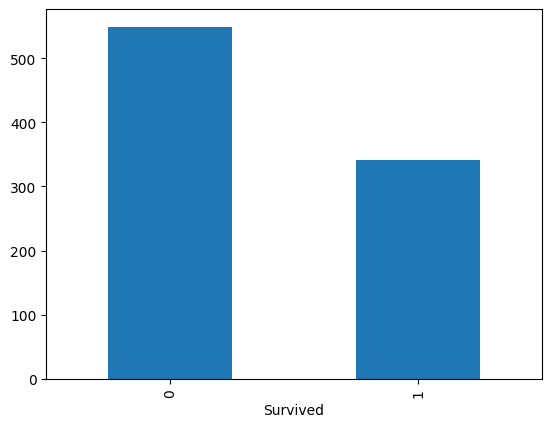

In [ ]:
train_set['Survived'].value_counts().plot(kind = 'bar')
train_set['Survived'].value_counts(normalize=True)

Note que o dataset apresenta uma taxa de sobrevivência de, aproximadamente, 40%. É possível considerá-lo balanceado, já que a diferença não é tão gritante.

Ainda assim, a fim de refinar o treinamento da Random Forest, vamos balancear os dados. Uma vez que eles já foram tratados, vamos utilizar a técnica de sobreamostragem (*oversampling*) para diminuir a disparidade entre as classes de sobreviventes.

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Note que, agora, a proporção entre sobreviventes e não-sobreviventes é de 1:1. Os dados estão balanceados, então vamos nos ater à acurácia para definir a qualidade do modelo.

Survived
1    0.5
0    0.5
Name: proportion, dtype: float64

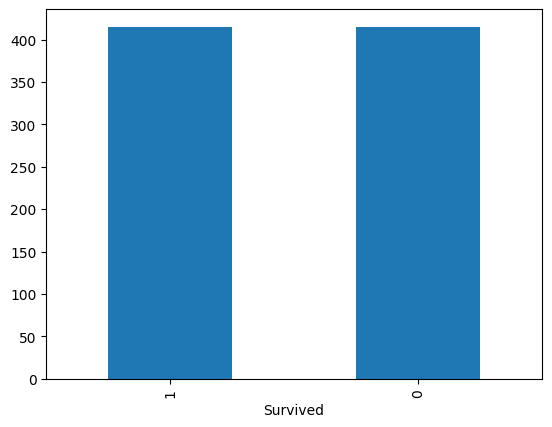

In [ ]:
y_resampled.value_counts().plot(kind = 'bar')
y_resampled.value_counts(normalize=True)

Vamos começar utilizando os parâmetros default do RandomForestClassifier.

In [ ]:
RFC = RandomForestClassifier()

RFC.fit(X_resampled, y_resampled)
y_train_pred = RFC.predict(X_resampled)
y_test_pred = RFC.predict(X_test)

print(f'Acurácia de Treino: {accuracy_score(y_resampled, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test, y_test_pred)}')

Acurácia de Treino: 0.9481927710843373
Acurácia de Validação: 0.7757847533632287


Note que, enquanto que a acurácia do conjunto de treino é de 95%, a da validação é de apenas 78%, o que indica que nosso modelo está sofrendo de *overfitting*.

Para atenuar isso, vamos modificar os seguintes parâmetros do modelo:
- **`max_depth`:** Profundidade máxima das árvores de decisão, `default = None`.
- **`n_estimators`:** Número de árvores de decisão no modelo, `default = 100`.
- **`min_samples_leaf`:** Número mínimo de amostras necessárias por folha, `default = 1`.
- **`min_samples_split`:** Número mínimo de amostras necessárias para repartir um nó interno, `default = 2`.
- **`max_leaf_nodes`:** Número máximo de folhas por árvore de decisão, `default = None`.

Vamos analisar como a diferença entre a acurácia do conjunto de treinamento e de validação se comporta com a mudança de cada parâmetro em um intervalo predefinido.

In [ ]:
t_max_depth = []
v_max_depth = []

for max_depth in range (1, 1000, 50):
    RFC = RandomForestClassifier(max_depth=max_depth)

    RFC.fit(X_resampled, y_resampled)
    y_train_pred = RFC.predict(X_resampled)
    y_test_pred = RFC.predict(X_test)

    t_max_depth.append(accuracy_score(y_resampled, y_train_pred))
    v_max_depth.append(accuracy_score(y_test, y_test_pred))

###########################################################################

t_n_estimators = []
v_n_estimators = []

for n_estimators in range (100, 1000, 50):
    RFC = RandomForestClassifier(n_estimators=n_estimators)

    RFC.fit(X_resampled, y_resampled)
    y_train_pred = RFC.predict(X_resampled)
    y_test_pred = RFC.predict(X_test)

    t_n_estimators.append(accuracy_score(y_resampled, y_train_pred))
    v_n_estimators.append(accuracy_score(y_test, y_test_pred))

###########################################################################

t_min_samples_leaf = []
v_min_samples_leaf = []

for min_samples_leaf in range (1, 1000, 50):
    RFC = RandomForestClassifier(min_samples_leaf=min_samples_leaf)

    RFC.fit(X_resampled, y_resampled)
    y_train_pred = RFC.predict(X_resampled)
    y_test_pred = RFC.predict(X_test)

    t_min_samples_leaf.append(accuracy_score(y_resampled, y_train_pred))
    v_min_samples_leaf.append(accuracy_score(y_test, y_test_pred))

###########################################################################

t_min_samples_split = []
v_min_samples_split = []

for min_samples_split in range (2, 1000, 50):
    RFC = RandomForestClassifier(min_samples_split=min_samples_split)

    RFC.fit(X_resampled, y_resampled)
    y_train_pred = RFC.predict(X_resampled)
    y_test_pred = RFC.predict(X_test)

    t_min_samples_split.append(accuracy_score(y_resampled, y_train_pred))
    v_min_samples_split.append(accuracy_score(y_test, y_test_pred))

###########################################################################

t_max_leaf_nodes = []
v_max_leaf_nodes = []

for max_leaf_nodes in range (2,20,2):
    RFC = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes)

    RFC.fit(X_resampled, y_resampled)
    y_train_pred = RFC.predict(X_resampled)
    y_test_pred = RFC.predict(X_test)

    t_max_leaf_nodes.append(accuracy_score(y_resampled, y_train_pred))
    v_max_leaf_nodes.append(accuracy_score(y_test, y_test_pred))

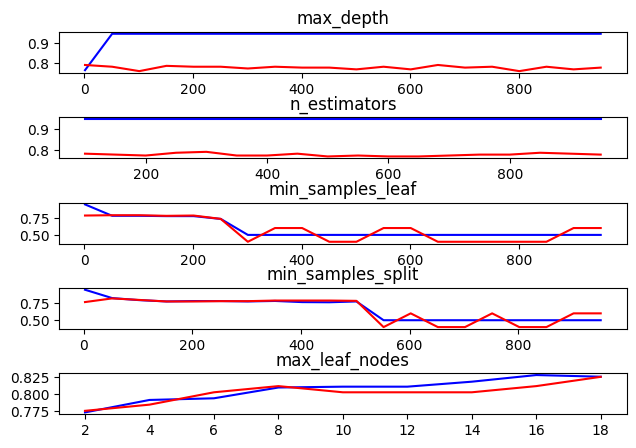

In [ ]:
fig, axs = plt.subplots(5)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0].plot(range(1,1000,50), t_max_depth, '-b', range(1, 1000, 50), v_max_depth, '-r')
axs[0].set_title("max_depth")

axs[1].plot(range(100,1000,50), t_n_estimators, '-b',range(100, 1000, 50), v_n_estimators, '-r')
axs[1].set_title("n_estimators")

axs[2].plot(range(1,1000,50), t_min_samples_leaf, '-b',range(1,1000,50), v_min_samples_leaf, '-r')
axs[2].set_title("min_samples_leaf")

axs[3].plot(range(2,1000,50), t_min_samples_split, '-b',range(2,1000,50), v_min_samples_split, '-r')
axs[3].set_title("min_samples_split")

axs[4].plot(range(2,20,2), t_max_leaf_nodes, '-b',range(2,20,2), v_max_leaf_nodes, '-r')
axs[4].set_title("max_leaf_nodes")

plt.show()

Note que, no intervalo observado, enquanto que a variação de `n_estimators` e `max_depth` não impacta muito na disparidade entre a acurácia de treinamento e de validação, outros parâmetros como `max_leaf_nodes` e `min_samples_split` possuem grande influência nisso.

Dessa forma, a fim de ajustar o problema do overfitting, vamos treinar o modelo com os seguintes parâmetros:

- **`max_depth`:** `default = (None)`.
- **`n_estimators`:** `default = 100`.
- **`min_samples_leaf`:** `100`.
- **`min_samples_split`:** `400`.
- **`max_leaf_nodes`:** `4`.

In [ ]:
RFC = RandomForestClassifier(min_samples_leaf=100,min_samples_split=400,max_leaf_nodes=4)

RFC.fit(X_resampled, y_resampled)
y_train_pred = RFC.predict(X_resampled)
y_test_pred = RFC.predict(X_test)

print(f'Acurácia de Treino: {accuracy_score(y_resampled, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test, y_test_pred)}')

Acurácia de Treino: 0.7795180722891566
Acurácia de Validação: 0.7892376681614349


Assim, podemos notar que, apesar de a acurácia de treinamento ter diminuído, ela está de acordo com a acurácia de validação, o que indica um valor mais fiel à qualidade do modelo.

#### **Decision Tree**

Utilizando os parâmetros default do DecisionTreeClassifier.


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_resampled, y_resampled)
y_trainclf_pred = clf.predict(X_resampled)
y_testclf_pred = clf.predict(X_test)

print(f'Acurácia de Treino: {accuracy_score(y_resampled, y_trainclf_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test, y_testclf_pred)}')

Acurácia de Treino: 0.9481927710843373
Acurácia de Validação: 0.7668161434977578


É fácil perceber que houve o *overfitting*, a acurácia do nosso conjunto de teste chegou a 95%, um valor muito elevado, enquanto que no conjunto de validação a acurácia foi apenas de 77%. Esse *overfitting* não é surpreendente tendo em vista que foram utilizados os valores padrão do DecisionTreeClassifier. A árvore pode crescer indiscirminadamente, e também não há limitação de divisão para os nós.

[Text(0.5, 0.875, 'Title_Mr <= 0.5\ngini = 0.5\nsamples = 830\nvalue = [415, 415]'),
 Text(0.25, 0.625, 'FamilySize <= 0.379\ngini = 0.333\nsamples = 393\nvalue = [83, 310]'),
 Text(0.125, 0.375, 'Pclass_3 <= 0.5\ngini = 0.255\nsamples = 347\nvalue = [52, 295]'),
 Text(0.0625, 0.125, 'gini = 0.123\nsamples = 212\nvalue = [14, 198]'),
 Text(0.1875, 0.125, 'gini = 0.404\nsamples = 135\nvalue = [38, 97]'),
 Text(0.375, 0.375, 'Pclass_3 <= 0.5\ngini = 0.44\nsamples = 46\nvalue = [31, 15]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4375, 0.125, 'gini = 0.349\nsamples = 40\nvalue = [31, 9]'),
 Text(0.75, 0.625, 'Fare <= 0.051\ngini = 0.365\nsamples = 437\nvalue = [332, 105]'),
 Text(0.625, 0.375, 'Fare <= 0.015\ngini = 0.292\nsamples = 327\nvalue = [269, 58]'),
 Text(0.5625, 0.125, 'gini = 0.174\nsamples = 83\nvalue = [75, 8]'),
 Text(0.6875, 0.125, 'gini = 0.326\nsamples = 244\nvalue = [194, 50]'),
 Text(0.875, 0.375, 'Pclass_2 <= 0.5\ngini = 0.489\nsamples =

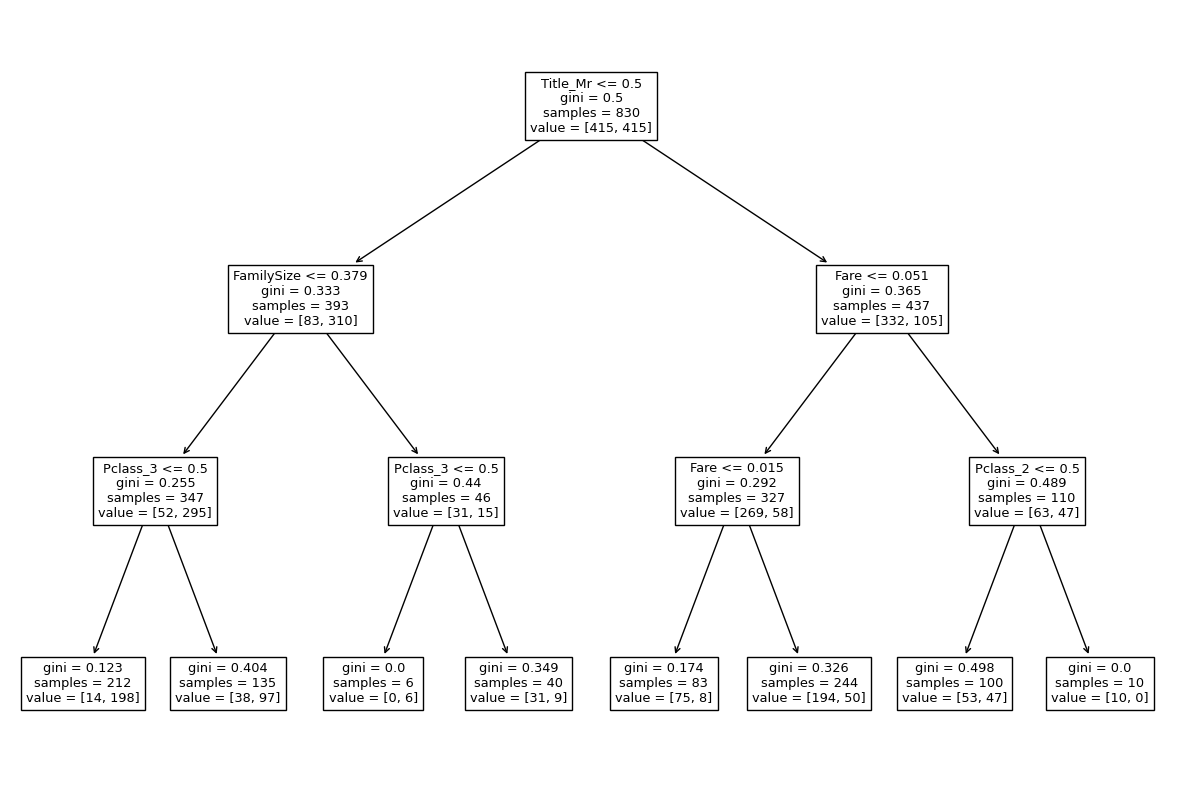

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_resampled, y_resampled)
y_trainclf_pred = clf.predict(X_resampled)
y_testclf_pred = clf.predict(X_test)

plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X_resampled.columns)

A seguir forem feitos alguns experimentos, variando os parâmetros: `max_depth`, `min_samples_leaf`, `min_samples_split`, e `max_leaf_nodes`.

In [ ]:
DT_t_max_depth = []
DT_v_max_depth = []

for max_depth in range (1, 20, 2):
    DT = tree.DecisionTreeClassifier(max_depth=max_depth)

    DT.fit(X_resampled, y_resampled)
    y_train_pred = DT.predict(X_resampled)
    y_test_pred = DT.predict(X_test)

    DT_t_max_depth.append(accuracy_score(y_resampled, y_train_pred))
    DT_v_max_depth.append(accuracy_score(y_test, y_test_pred))

###########################################################################

DT_t_min_samples_leaf = []
DT_v_min_samples_leaf = []

for min_samples_leaf in range (1, 460, 20):
    DT = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)

    DT.fit(X_resampled, y_resampled)
    y_train_pred = DT.predict(X_resampled)
    y_test_pred = DT.predict(X_test)

    DT_t_min_samples_leaf.append(accuracy_score(y_resampled, y_train_pred))
    DT_v_min_samples_leaf.append(accuracy_score(y_test, y_test_pred))

###########################################################################

DT_t_min_samples_split = []
DT_v_min_samples_split = []

for min_samples_split in range (2, 1000, 50):
    DT = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)

    DT.fit(X_resampled, y_resampled)
    y_train_pred = DT.predict(X_resampled)
    y_test_pred = DT.predict(X_test)

    DT_t_min_samples_split.append(accuracy_score(y_resampled, y_train_pred))
    DT_v_min_samples_split.append(accuracy_score(y_test, y_test_pred))

###########################################################################

DT_t_max_leaf_nodes = []
DT_v_max_leaf_nodes = []

for max_leaf_nodes in range (2, 20, 2):
    DT = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)

    DT.fit(X_resampled, y_resampled)
    y_train_pred = DT.predict(X_resampled)
    y_test_pred = DT.predict(X_test)

    DT_t_max_leaf_nodes.append(accuracy_score(y_resampled, y_train_pred))
    DT_v_max_leaf_nodes.append(accuracy_score(y_test, y_test_pred))

  O gráfico abaixo mostra a comparação entre os resultado do conjunto de dados de treino e com o conjunto de dados de teste, de acordo com a variação de cada parâmetro listado.

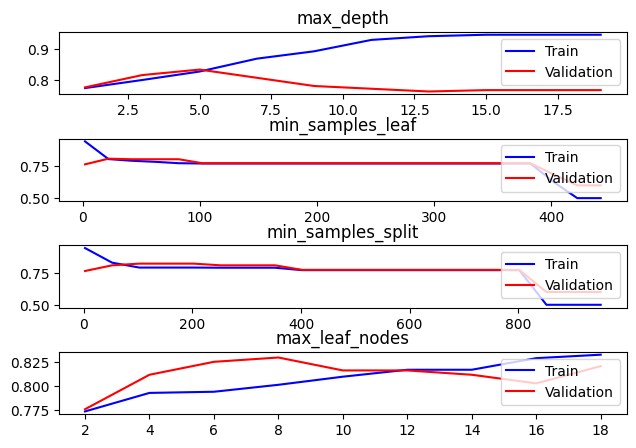

In [ ]:
fig, axs = plt.subplots(4)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0].plot(range(1, 20, 2), DT_t_max_depth, '-b', label='Train')
axs[0].plot(range(1, 20, 2), DT_v_max_depth, '-r', label='Validation')
axs[0].set_title("max_depth")
axs[0].legend(loc='best')


axs[1].plot(range(2, 450, 20), DT_t_min_samples_leaf, '-b', label='Train')
axs[1].plot(range(2, 450, 20), DT_v_min_samples_leaf, '-r', label='Validation')
axs[1].set_title("min_samples_leaf")
axs[1].legend(loc='best')

axs[2].plot(range(2, 1000, 50), DT_t_min_samples_split, '-b', label='Train')
axs[2].plot(range(2, 1000, 50), DT_v_min_samples_split, '-r', label='Validation')
axs[2].set_title("min_samples_split")
axs[2].legend(loc='best')

axs[3].plot(range(2, 20, 2), DT_t_max_leaf_nodes, '-b', label='Train')
axs[3].plot(range(2, 20, 2), DT_v_max_leaf_nodes, '-r', label='Validation')
axs[3].set_title("max_leaf_nodes")
axs[3].legend(loc='best')

plt.show()

Por fim, conclui-se que estes parâmetros estão correlacionados, por isso, para evitar o *overfitting*, um ajuste em um dos parâmetros já é o suficiente. O parâmetro escolhido foi `min_samples_leaf`, garantimos que cada folha tenha pelo menos 150 dados para evitar o overfiting. Esse mudança significa que a àrvore não esta se ajustando totalmente aos dados de treino, o que é refletido pelas acurácias mostradas abaixo.

In [ ]:
DT = RandomForestClassifier(min_samples_leaf=150)

DT.fit(X_resampled, y_resampled)
y_train_pred = DT.predict(X_resampled)
y_test_pred = DT.predict(X_test)

print(f'Acurácia de Treino: {accuracy_score(y_resampled, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test, y_test_pred)}')

Acurácia de Treino: 0.7807228915662651
Acurácia de Validação: 0.7892376681614349
